# Actividad-Bloch

### 1. Importación de librerías

In [34]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import ComplejosCalcu
import numpy as np
import math
%matplotlib notebook

### 2. Ejercicio de calentamiento

Grafique una esfera que representará el planeta Tierra. Grafique como puntos sobre la esfera cada una de las ciudades dadas, asegúrese de crear también una etiqueta con el nombre de la ciudad. Expanda la lista con 5 ciudades de su elección.

<IPython.core.display.Javascript object>


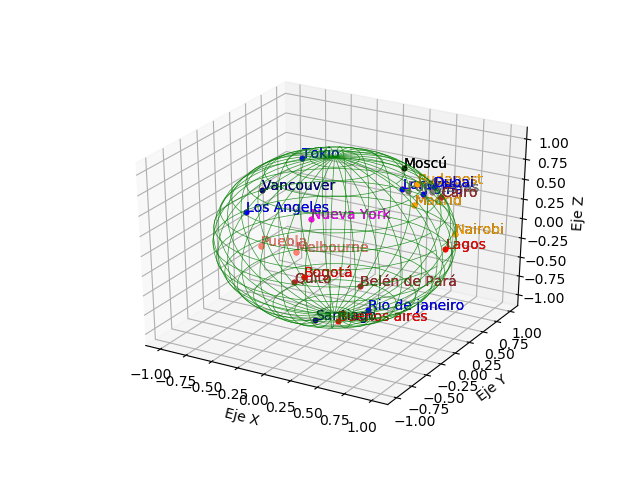

In [181]:
Ciudades = [
    ['Londres', 51.5, -0.1167,'blue'],
    ['Bogotá', 4.5964, -74.0833,'red'],
    ['Roma', 41.8960, 12.4833,'blue'],
    ['Melbourne', -37.8200, 144.9750,'salmon'],
    ['Nairobi', -1.2833, 36.8167,'orange'],
    ['Santiago', -33.4500, -70.6670,'navy'],
    ['Nueva York', 40.6943, -73.9249,'magenta'],
    ['Los Angeles', 34.1139, -118.4068,'blue'],
    ['Moscú', 55.7522, 37.6155,'black'],
    ['Quito', -0.2150, -78.5001,'brown'],
    ['Tokio', 35.6850, 139.7514,'blue'],
    ['Lagos', 6.4433, 3.3915,'red'],
    ['Atenas', 37.9833, 23.7333,'gray'],
    ['Belén de Pará', -1.4500, -48.4800,'brown'],
    ['Budapest', 47.5000, 19.0833,'orange'],
    ['Vancouver', 49.2734, -123.1216,'navy'],
    ['París', 48.8667, 2.3333,'gray'],
    ['Puebla', 19.0500, -98.2000,'salmon'],
    ['Dubai',25.276987,55.296249,'blue'],
    ['Rio de janeiro',-22.9064198,-43.1822319,'blue'],
    ['Buenos aires',-34.6131516,-58.3772316,'red'],
    ['Madrid',40.4165000,-3.7025600,'orange'],
    ['Cairo',30.0626300,31.2496700,'brown']
]
def crear(ciudades):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    phi, theta = np.mgrid[0 : 2 * np.pi : 0.1, 0 : np.pi : 0.1]  # Equivale a hacer un doble for

    # Para pasar de coordenadas esféricas (phi, theta) a coordenadas cartesianas (x, y, z):

    x = np.cos(phi) * np.sin(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(theta)

    # Para graficar la esfera (estructura de alambre):

    ax.plot_wireframe(x, y, z, color='green', rstride=2, cstride=2, linewidth=0.5, alpha=0.8)

    # El formato de cada entrada de la lista es: [Nombre_Ciudad, Latitud, Longitud]
 

    for i in range(len(ciudades)):
        nombre = Ciudades[i][0]
        colors = Ciudades[i][3]
        Phi=(Ciudades[i][2]*math.pi)/180
        Theta=((-Ciudades[i][1]+90)*math.pi)/180
        x1 = np.cos(Phi) * np.sin(Theta)
        y1 = np.sin(Phi) * np.sin(Theta)
        z1 = np.cos(Theta)
        ax.scatter(x1, y1, z1, color='red', s=10)
        ax.text(x1, y1, z1,Ciudades[i][0] , color='black')
    
 
        # Para graficar un punto cualquiera en el espacio 3d, en este caso (2, -2, 1):

        ax.scatter(x1, y1, z1, color = colors, s=10) # El valor de s modifica el grosor del punto

        # Para hacer una etiqueta, en este caso sobre el punto (2, -2, 1):
    
        ax.text(x1, y1, z1, nombre, color= colors)
    
        # Para graficar una flecha, en este caso del origen al punto (2, -2, 1):

        #ax.quiver(0, 0, 0, x1, y1, z1, color= colors)

    # Nombres de los ejes

    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Eje Z')

    plt.show()
crear(Ciudades)

### 3. Ejercicio la esfera de Bloch

Grafique una esfera. Use su función ket_a_Bloch para graficar como flechas cada uno de los siguientes kets básicos:

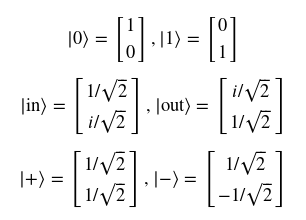

Además de estos 6 kets que forman los ejes de la esfera de Bloch, queremos graficar un ket cualquiera ingresado por el usuario. El resultado de este ejercicio debe concordar con la siguiente representación:

<IPython.core.display.Javascript object>


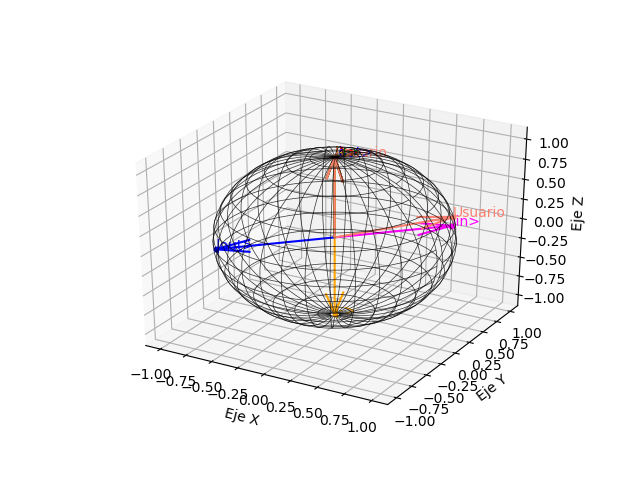

In [180]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

phi, theta = np.mgrid[0 : 2 * np.pi : 0.1, 0 : np.pi : 0.1]  # Equivale a hacer un doble for

# Para pasar de coordenadas esféricas (phi, theta) a coordenadas cartesianas (x, y, z):

x = np.cos(phi) * np.sin(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(theta)

# Para graficar la esfera (estructura de alambre):

ax.plot_wireframe(x, y, z, color='black', rstride=2, cstride=2, linewidth=0.5, alpha=0.8)

# Función ket_a_Bloch
v1 =[[(1,0),(0,0)],[(0,0),(1,0)],[(1/math.sqrt(2),0),(0,1/math.sqrt(2))],[(0,1/math.sqrt(2)),(1/math.sqrt(2),0)],
     [(1/math.sqrt(2),0),(1/math.sqrt(2),0)],[(1/math.sqrt(2),0),(-1/math.sqrt(2),0)],
     [(math.sqrt(3)/(2*math.sqrt(2)),math.sqrt(3)/(2*math.sqrt(2))),(-1/4,math.sqrt(3)/4)]]

v2 =[('|0>','gray'),('|1>','red'),('|in>','magenta'),('|out>','blue'),('|+>','green'),('|->','orange'),('Usuario','salmon')] 

for j in range(len(v1)):
    bloch = ComplejosCalcu.esferaBloch(v1[j])

    for i in range (len(bloch)) :
        theta1 = bloch[i][1]
        phi1 = bloch[i][0]
        nombre = v2[j][0]
        colors = v2[j][1]
    
        x1 = np.cos(phi1) * np.sin(theta1)
        y1 = np.sin(phi1) * np.sin(theta1)
        z1 = np.cos(theta1)

    # Para graficar un punto cualquiera en el espacio 3d, en este caso (2, -2, 1):

        ax.scatter(x1, y1, z1, color = colors, s=10) # El valor de s modifica el grosor del punto

    # Para hacer una etiqueta, en este caso sobre el punto (2, -2, 1):

        ax.text(x1, y1, z1, nombre, color= colors)

    # Para graficar una flecha, en este caso del origen al punto (2, -2, 1):

        ax.quiver(0, 0, 0, x1, y1, z1, color= colors)

# Nombres de los ejes

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')

plt.show()

### 5. Ejercicio visualización en la esfera de Bloch de las transformaciones de un qubit

Declare arreglos para cada una de las transformaciones o compuertas cuánticas que se presentan en el texto guía: I, X, Y, Z, S, T, H, R(alpha), R_X(alpha), R_Y(alpha), R_Z(alpha), R_D(alpha). Grafique en paralelo dos esferas, la primera en el estado básico correpondiente al ejercicio anterior y la segunda debe estar bajo la acción de una de estas tranformaciones, según lo escoja el usuario. El resultado debe concordar con la siguiente figura:

<IPython.core.display.Javascript object>


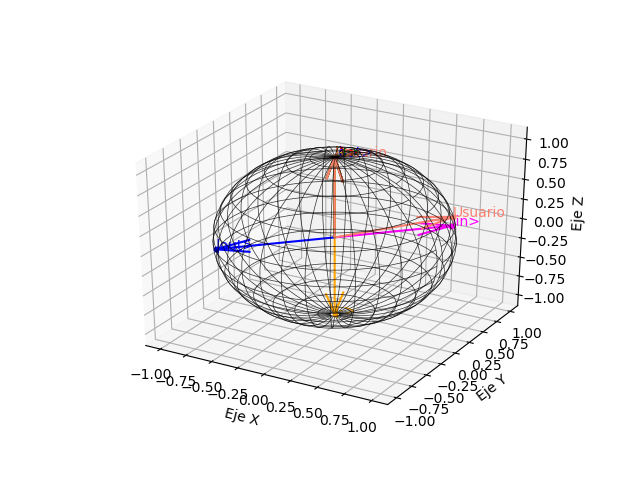

<IPython.core.display.Javascript object>


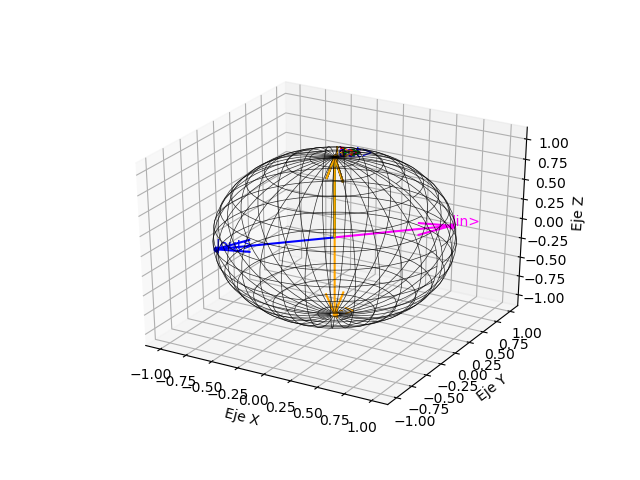

In [162]:
#ESTADO BÁSICO

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

phi, theta = np.mgrid[0 : 2 * np.pi : 0.1, 0 : np.pi : 0.1]  # Equivale a hacer un doble for

# Para pasar de coordenadas esféricas (phi, theta) a coordenadas cartesianas (x, y, z):

x = np.cos(phi) * np.sin(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(theta)

# Para graficar la esfera (estructura de alambre):

ax.plot_wireframe(x, y, z, color='black', rstride=2, cstride=2, linewidth=0.5, alpha=0.8)

# Función ket_a_Bloch
v1 =[[(1,0),(0,0)],[(0,0),(1,0)],[(1/math.sqrt(2),0),(0,1/math.sqrt(2))],[(0,1/math.sqrt(2)),(1/math.sqrt(2),0)],
     [(1/math.sqrt(2),0),(1/math.sqrt(2),0)],[(1/math.sqrt(2),0),(-1/math.sqrt(2),0)],
     [(math.sqrt(3)/(2*math.sqrt(2)),math.sqrt(3)/(2*math.sqrt(2))),(-1/4,math.sqrt(3)/4)]]

v2 =[('|0>','gray'),('|1>','red'),('|in>','magenta'),('|out>','blue'),('|+>','green'),('|->','orange'),('Usuario','salmon')] 

for j in range(len(v1)):
    bloch = ComplejosCalcu.esferaBloch(v1[j])

    for i in range (len(bloch)) :
        theta1 = bloch[i][1]
        phi1 = bloch[i][0]
        nombre = v2[j][0]
        colors = v2[j][1]
    
        x1 = np.cos(phi1) * np.sin(theta1)
        y1 = np.sin(phi1) * np.sin(theta1)
        z1 = np.cos(theta1)

    # Para graficar un punto cualquiera en el espacio 3d, en este caso (2, -2, 1):

        ax.scatter(x1, y1, z1, color = colors, s=10) # El valor de s modifica el grosor del punto

    # Para hacer una etiqueta, en este caso sobre el punto (2, -2, 1):

        ax.text(x1, y1, z1, nombre, color= colors)

    # Para graficar una flecha, en este caso del origen al punto (2, -2, 1):

        ax.quiver(0, 0, 0, x1, y1, z1, color= colors)

# Nombres de los ejes

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')

plt.show()
  
'''--------------------------------------------------------------------------------------------------------------------'''
#ACCIÓN DE UNA TRANSFORMACIÓN

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

phi, theta = np.mgrid[0 : 2 * np.pi : 0.1, 0 : np.pi : 0.1]  # Equivale a hacer un doble for

#Arreglos de cada compuerta cuántica
I = [[(1,0),(0,0)],[(0,0),(1,0)]]
X = [[(0,0),(1,0)],[(1,0),(0,0)]]
Y = [[(0,0),(0,-1)],[(0,1),(0,0)]]
Z = [[(1,0),(0,0)],[(0,0),(-1,0)]]
S = [[(1,0),(0,0)],[(0,0),(0,1)]]
T = [[(1,0),(0,0)],[(0,0),(0,0.785)]]
H = [[(1/math.sqrt(2),0),(1/math.sqrt(2),0)],[(1/math.sqrt(2),0),(-1/math.sqrt(2),0)]]
#R(θ) = [[(1,0),(0,0)],[(0,0),(0,2.718**θ)]]
#Rx(θ) = [[[math.acos(θ/2),0],[0,-math.asin(θ/2)]],[[0,-math.asin(θ/2)],[math.acos(θ/2),0]]]
#Ry(θ) =  [[[math.acos(θ/2),0],[-math.asin(θ/2),0]],[[math.asin(θ/2),0],[math.acos(θ/2),0]]]

# Para pasar de coordenadas esféricas (phi, theta) a coordenadas cartesianas (x, y, z):

x = np.cos(phi) * np.sin(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(theta)

# Para graficar la esfera (estructura de alambre):

ax.plot_wireframe(x, y, z, color='black', rstride=2, cstride=2, linewidth=0.5, alpha=0.8)

# Función ket_a_Bloch
v1 =[[(1,0),(0,0)],[(0,0),(1,0)],[(1/math.sqrt(2),0),(0,1/math.sqrt(2))],[(0,1/math.sqrt(2)),(1/math.sqrt(2),0)],
     [(1/math.sqrt(2),0),(1/math.sqrt(2),0)],[(1/math.sqrt(2),0),(-1/math.sqrt(2),0)]]

v2 =[('|0>','gray'),('|1>','red'),('|in>','magenta'),('|out>','blue'),('|+>','green'),('|->','orange')]

for j in range(len(v1)):
    bloch =  ComplejosCalcu.esferaBloch(ComplejosCalcu.accionMatriz(,v1[j]))

    for i in range (len(bloch)) :
        theta1 = bloch[i][1]
        phi1 = bloch[i][0]
        nombre = v2[j][0]
        colors = v2[j][1]
    
        x1 = np.cos(phi1) * np.sin(theta1)
        y1 = np.sin(phi1) * np.sin(theta1)
        z1 = np.cos(theta1)

    # Para graficar un punto cualquiera en el espacio 3d, en este caso (2, -2, 1):

        ax.scatter(x1, y1, z1, color = colors, s=10) # El valor de s modifica el grosor del punto

    # Para hacer una etiqueta, en este caso sobre el punto (2, -2, 1):

        ax.text(x1, y1, z1, nombre, color= colors)

    # Para graficar una flecha, en este caso del origen al punto (2, -2, 1):

        ax.quiver(0, 0, 0, x1, y1, z1, color= colors)

# Nombres de los ejes

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')

plt.show()